In [1]:
print('hello world')

hello world


In [2]:
import gensim

In [5]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [6]:
vec = wv['king']

In [7]:
vec

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [8]:
vec1 = wv['king']-wv['queen']+wv['women']

In [9]:
wv.similar_by_word(vec1)

[('women', 0.6422803997993469),
 ('men', 0.6162621974945068),
 ('Men', 0.4448600709438324),
 ('widows_divorcees', 0.4165157973766327),
 ('Women', 0.40169745683670044),
 ('fathers', 0.4005565643310547),
 ('MSMs', 0.39677494764328003),
 ('husbands', 0.3889451026916504),
 ('uniforms_rousted', 0.3867894113063812),
 ('males', 0.37693318724632263)]

In [17]:
wv.most_similar('google')

[('google.com', 0.6711485981941223),
 ('google_yahoo', 0.6488178968429565),
 ('wikipedia', 0.643608033657074),
 ('www.google.com', 0.6258559226989746),
 ('googled', 0.6166064143180847),
 ('googling', 0.6086059212684631),
 ('slashdot', 0.5964587330818176),
 ('lifehacker', 0.5948858857154846),
 ('gizmodo', 0.5884420275688171),
 ('inurl', 0.5882638692855835)]

## Solving problem of SPAM Detection

In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
cv = CountVectorizer()

In [19]:
df = pd.read_csv('spam.csv', encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
print(f'the null values in dataframe -->  {df.text.isnull().sum()}')
print(f'the duduplicated values in dataframe -->  {df.text.duplicated().sum()}')

the null values in dataframe -->  0
the duduplicated values in dataframe -->  403


In [27]:
df.drop_duplicates(keep='first', inplace=True)

In [29]:
df.shape

(5169, 2)

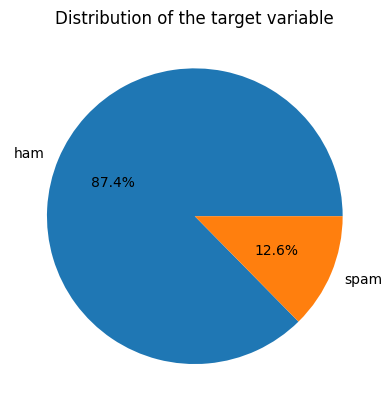

In [32]:
# plot the ham and spam size
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%1.1f%%')
plt.title('Distribution of the target variable')
plt.show()

In [41]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopwords]
    text = [lemma.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text

In [43]:
import nltk
transform_text('I am learning Python and I am learning Machine Learning')


'learning python learning machine learning'

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [47]:
# !pip install wordcloud -q
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(df['transformed_text']))

Text(0.5, 1.0, 'Most common words in ham messages')

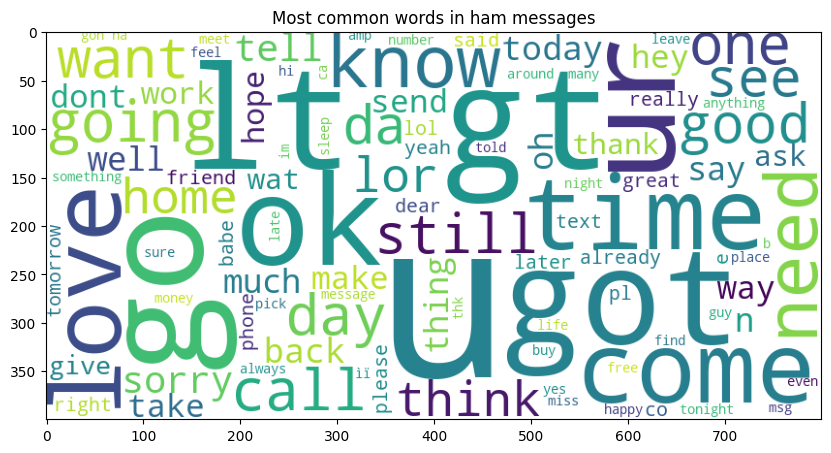

In [48]:
ham_wc = wc.generate(' '.join(df[df['target'] == 0]['transformed_text']))
plt.figure(figsize=(10, 6))
plt.imshow(ham_wc)
plt.title('Most common words in ham messages')

In [49]:
X = cv.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
etc = ExtraTreeClassifier()
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
dtc = DecisionTreeClassifier(max_depth=5)
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [52]:
classifiers = {
    'Extra Tree Classifier': etc,
    'Support Vector Classifier': svc,
    'K Neighbors Classifier': knn,
    'Random Forest Classifier': rfc,
    'Decision Tree Classifier': dtc,
    'Multinomial Naive Bayes': mnb, 
    'Gaussian Naive Bayes': gnb,
    'Bernoulli Naive Bayes': bnb
}

In [53]:
def evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers):
    precision_scores = []
    accuracy_scores = []
    
    for name, model in classifiers.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate precision and accuracy
        precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the results
        precision_scores.append(precision)
        accuracy_scores.append(accuracy)
    
    # Create a DataFrame to hold the performance scores
    performance_df = pd.DataFrame({
        'Model': list(classifiers.keys()), 
        'Accuracy': accuracy_scores, 
        'Precision': precision_scores
    }).sort_values(by='Precision', ascending=False)
    
    return performance_df

In [54]:
performance_cv = evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers)
print(performance_cv)

                       Model  Accuracy  Precision
2     K Neighbors Classifier  0.902321   1.000000
3   Random Forest Classifier  0.970019   0.981982
7      Bernoulli Naive Bayes  0.969052   0.973214
4   Decision Tree Classifier  0.927466   0.931507
0      Extra Tree Classifier  0.942940   0.891089
5    Multinomial Naive Bayes  0.963250   0.828947
1  Support Vector Classifier  0.923598   0.712230
6       Gaussian Naive Bayes  0.894584   0.570048


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf1 = TfidfVectorizer(max_features=3000) # max_features = 3000 
X = tfidf1.fit_transform(df['transformed_text']).toarray()
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [65]:
performance_tfidf_3000 = evaluate_vectorizer(X_train, X_test, y_train, y_test, {'Random Forest Classifier':rfc})
performance_tfidf_3000

,Model,Accuracy,Precision
0,Random Forest Classifier,0.975822,0.982906


In [66]:
import pickle

vectorizer = TfidfVectorizer(max_features=3000)
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

In [68]:
best_model = BernoulliNB()
pickle.dump(best_model, open('model.pkl', 'wb'))